# Time Series Analysis with Python
We look at the Google trends of the words 'diet', 'gym', and 'finance' and apply some simple time series analysis to analyze people's search pattern of these words over time.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# settings
from IPython.display import display

In [35]:
df = pd.read_csv('data.csv')

In [36]:
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


In [38]:
df.columns = ['year_month', 'diet', 'gym', 'finance']
df.head()

,year_month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [39]:
# convert year-month column into datetime
df.month = pd.to_datetime(df.year_month)
df.set_index('year_month', inplace=True)

In [40]:
df.head()

,diet,gym,finance
year_month,,,
2004-01,100,31,48
2004-02,75,26,49
2004-03,67,24,47
2004-04,70,22,48
2004-05,72,22,43


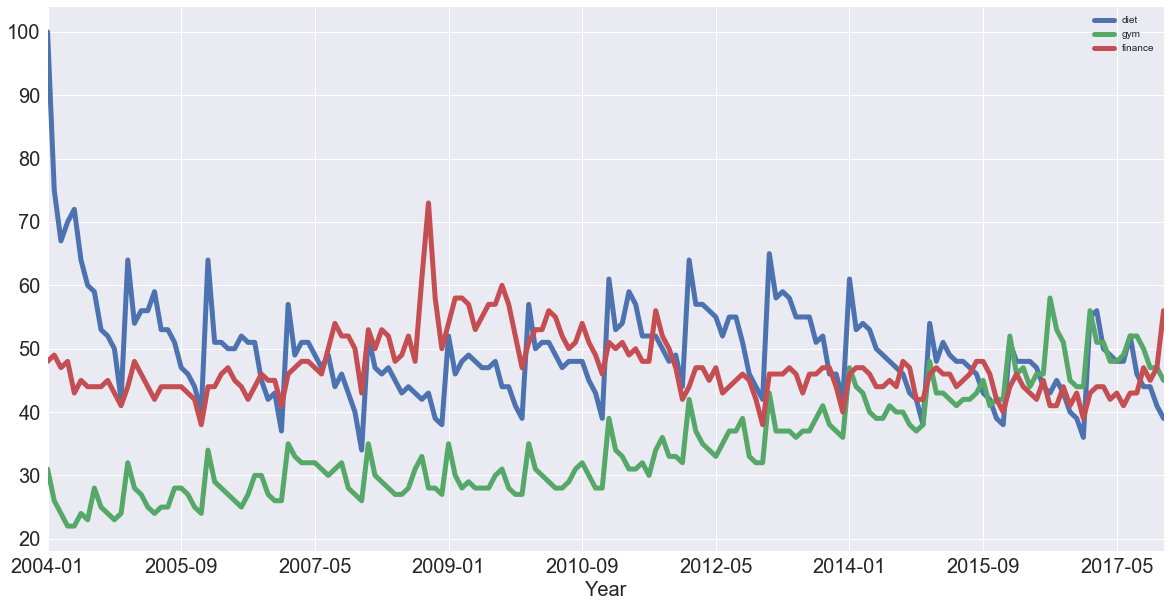

In [41]:
df.plot(figsize=(20,10), linewidth=5, fontsize=20);
plt.xlabel('Year', fontsize=20);

There's seasonality within each year in all three categories. We expect people to look up gym, diet, and finance more frequently early in the new year as they follow through on their new year's resolution. As interest wane over time, searches for these keywords are likely to also decrease. We can look at this more systematically by looking at a tabulation of the within-year peaks and troughs across each month for each term.

In [56]:
# create year and month columns
df['year_month'] = df.index.values
s = df['year_month'].apply(lambda x: x.split('-'))
df['year'] = s.apply(lambda x: x[0])
df['month'] = s.apply(lambda x: x[1])

<class 'pandas.core.frame.DataFrame'>
Index: 168 entries, 2004-01 to 2017-12
Data columns (total 7 columns):
diet                 168 non-null int64
gym                  168 non-null int64
finance              168 non-null int64
rolling_mean_diet    157 non-null float64
year_month           168 non-null object
year                 168 non-null object
month                168 non-null object
dtypes: float64(1), int64(3), object(3)
memory usage: 15.5+ KB


In [172]:
def peaktrough_month(col, param='max'):
    print('Month corresponding to {0} of "{1}" in a year'.format(param, col))
    
    if param=='max':
        groupby_ops = df.loc[df.groupby(['year'])[col].idxmax()]
    elif param=='min':
        groupby_ops = df.loc[df.groupby(['year'])[col].idxmin()]
    else:
        print("Set param to max or min only")
    
    return (groupby_ops.loc[:, [col, 'month']]
                       .groupby('month')
                       .count())

In [178]:
display(peaktrough_month('diet', param='max'))
peaktrough_month('diet', param='min')

Month corresponding to max of "diet" in a year


,diet
month,
01,13
02,1


Month corresponding to min of "diet" in a year


,diet
month,
12,14


In [179]:
display(peaktrough_month('gym', param='max'))
peaktrough_month('gym', param='min')

Month corresponding to max of "gym" in a year


,gym
month,
01,13
07,1


Month corresponding to min of "gym" in a year


,gym
month,
04,2
05,5
06,1
07,1
11,3
12,2


In [180]:
display(peaktrough_month('finance', param='max'))
peaktrough_month('finance', param='min')

Month corresponding to max of "finance" in a year


,finance
month,
02,4
04,3
08,3
09,2
10,1
12,1


Month corresponding to min of "finance" in a year


,finance
month,
05,1
06,1
11,1
12,11


Here we see that, within a year, the peak number of times the word diet was searched was in January (month 1). For one year it falls on February, which is still pretty early in the new year. Conversely, the word diet was searched the fewest times in December (month 12) for all years.

People certainly look up 'gym' more frequently in January, but there appears to be no single month where their interest in searching for gym begin to wane. It does, however, show that people lose interest some time at the beginning of summer and at the last quarter of the year

For the 'finance' term, we see people take an interest early in the year and lose interest in the holidays.

## Rolling average

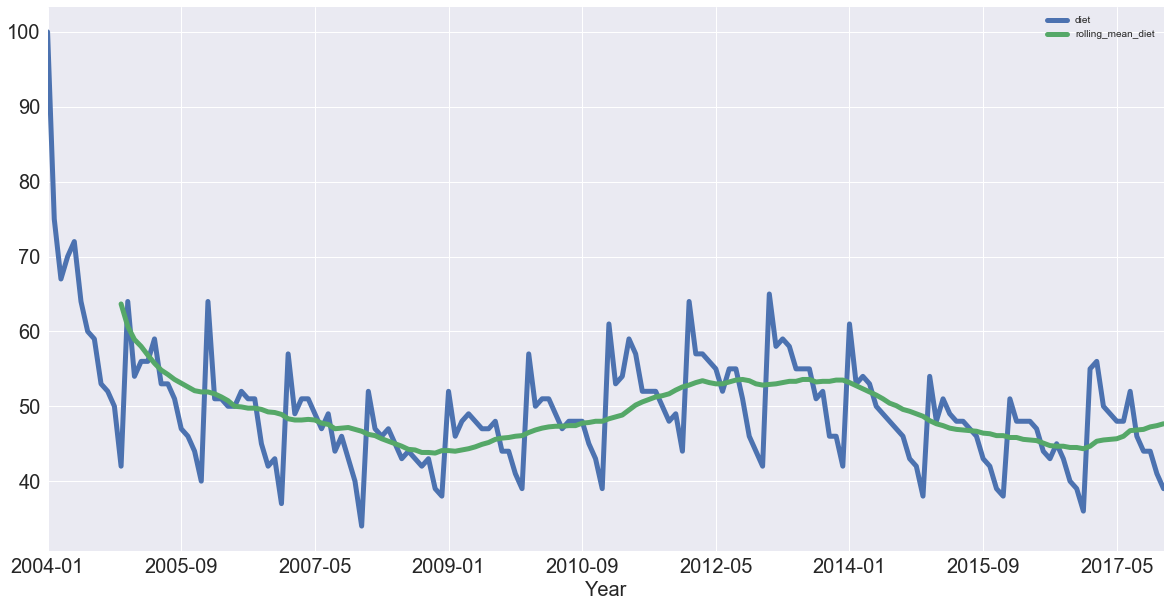

In [42]:
diet = df.diet
df['rolling_mean_diet'] = diet.rolling(12).mean()
df[['diet', 'rolling_mean_diet']].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);